##### 1) create stacked histogram showing if customers with more years being a customer w/ td go where when getting funded
##### 2) Volume totals; How much did -1 apply for here vs. how much did they fund with someonelse
##### 3) Add in broker, MMS and branch channels


In [4]:
import datasource as ds
import passencoder as pss
import pandasql as ps
import pandas as pd
u, p = pss.load_userpwd(r'C:\Users\razamo3\Documents\pass')



import numpy as np
import matplotlib.pyplot as plt

### Pulling all HELOC customers from CB table

In [25]:
#CB stuff
with ds.connect('dm',u,p) as con:
    q1 = """
    
            SELECT  a.Date_Key, a.cust_num, count(a.Prod_Ind) AS NoOfHLCs, sum(a.limit) as TotalLimit
            FROM [PBdm].[dbo].[Credit_Bureau] as a
            where  a.prod_ind = 'LOC' AND (a.NA_CD1 IN ('EQ','FG','HL','JC') or a.NA_CD2 IN ('EQ','FG','HL','JC'))
            GROUP BY a.cust_num, a.Date_Key, a.Prod_Ind
        """
    tb1 = con.read_sql(q1)


#tb1.to_pickle("tables/5-tb1.pkl")

In [6]:
tb1 = pd.read_pickle('tables/5-tb1.pkl')

In [7]:
tb1

,Date_Key,cust_num,NoOfHLCs,TotalLimit
0,20160630,405597438,2,234000
1,20160630,371368422,1,148000
2,20170430,584154027,2,108000
3,20170430,149421402,1,100000
4,20170430,305824527,2,82000
5,20170430,151873344,1,187000
6,20171231,485832591,1,240000
7,20160630,532281762,1,101000
8,20160630,165138138,1,308000
9,20171231,589952988,1,150000


In [8]:
tb1a = pd.pivot_table(tb1, values = ['NoOfHLCs', 'TotalLimit'], index =['cust_num'], columns =['Date_Key'])
tb1c = tb1a.fillna(0)

In [9]:
tb1c

NoOfHLCs                   TotalLimit                      
Date_Key  20160630 20170430 20171231   20160630   20170430   20171231
cust_num                                                             
108            1.0      1.0      1.0    20000.0    20000.0    20000.0
1494           1.0      0.0      0.0   500000.0        0.0        0.0
2367           1.0      1.0      1.0   500000.0   500000.0   500000.0
2376           2.0      2.0      2.0   530000.0   530000.0   530000.0
2781           0.0      0.0      1.0        0.0        0.0    33000.0
2862           2.0      2.0      1.0   387000.0   404000.0    68000.0
3177           2.0      2.0      2.0   301000.0   301000.0   301000.0
4077           1.0      1.0      1.0   250000.0   250000.0   250000.0
4266           1.0      1.0      1.0    53000.0   202000.0   112000.0
4473           1.0      1.0      1.0   167000.0   170000.0   172000.0
6129           1.0      1.0      0.0   170000.0   170000.0        0.0
6399           1.0      1.0      1.0   200000.0   200000.0   200000.0
7848           1.0      1.0      1.0   550000.0   550000.0   550000.0
8046           1.0      1.0      1.0  1000000.0  1000000.0  1000000.0
8937           2.0      2.0      2.0   612000.0  1050000.0  1050000.0
9432           1.0      1.0      1.0   200000.0   200000.0   200000.0
10026          0.0      1.0      1.0        0.0   400000.0   400000.0
10314          1.0      1.0      1.0  1000000.0  1000000.0  1000000.0
10953          1.0      1.0      1.0   648000.0   648000.0   648000.0
11304          1.0      1.0      0.0   150000.0   150000.0        0.0
12114          1.0      1.0      1.0   275000.0   275000.0   275000.0
12177          1.0      1.0      1.0  1000000.0  1000000.0  1000000.0
13473          1.0      1.0      1.0     8381.0    46000.0    51000.0
15669          1.0      1.0      1.0    85000.0    85000.0    85000.0
15678          1.0      1.0      1.0    85000.0    85000.0    85000.0
15912          1.0      1.0      1.0   279000.0   292000.0   303000.0
16461          2.0      2.0      2.0  1705000.0  1705000.0  1705000.0
17856          1.0      1.0      1.0   123000.0   139000.0   158000.0
18819          3.0      3.0      3.0  1136000.0  1136000.0  1136000.0
19917          1.0      1.0      1.0   294000.0   294000.0   294000.0
...            ...      ...      ...        ...        ...        ...
722320542      0.0      0.0      2.0        0.0        0.0   159000.0
722320551      0.0      0.0      1.0        0.0        0.0   168000.0
722320839      0.0      0.0      1.0        0.0        0.0    32000.0
722321604      0.0      0.0      1.0        0.0        0.0     1704.0
722322846      0.0      0.0      1.0        0.0        0.0   315000.0
722323386      0.0      0.0      1.0        0.0        0.0   290000.0
722325978      0.0      0.0      1.0        0.0        0.0    10000.0
722330793      0.0      0.0      1.0        0.0        0.0     7135.0
722334942      0.0      0.0      1.0        0.0        0.0    40000.0
722340225      0.0      0.0      1.0        0.0        0.0    11000.0
722343231      0.0      0.0      1.0        0.0        0.0   153000.0
722343978      0.0      0.0      1.0        0.0        0.0   178000.0
722344122      0.0      0.0      1.0        0.0        0.0   182000.0
722344419      0.0      0.0      1.0        0.0        0.0   313000.0
722344626      0.0      0.0      1.0        0.0        0.0   100000.0
722345778      0.0      0.0      1.0        0.0        0.0   559000.0
722346291      0.0      0.0      3.0        0.0        0.0   596000.0
722352663      0.0      0.0      1.0        0.0        0.0    80000.0
722353293      0.0      0.0      3.0        0.0        0.0   499000.0
722356254      0.0      0.0      1.0        0.0        0.0    50000.0
722356263      0.0      0.0      1.0        0.0        0.0    50000.0
722360367      0.0      0.0      1.0        0.0        0.0   192000.0
722366397      0.0      0.0      1.0        0.0        0.0        0.0
722378097      0.0  

### Pulling all TD HELOC customers

In [26]:
#vw_app stuff
with ds.connect('dm',u,p) as con:
    q1 = """
            SELECT credit_ref_num, cust_num, Total_Credit_Limit, Interest_Rate, Approved_Ind
                    , Release_Dt
            FROM [PBdm].[resl].[vw_Applications_Daily]
            WHERE product_group_cd = 'HELOC' and Fullapp_First_Submitted_Date_Key > 20170501
                                                    AND Fullapp_First_Submitted_Date_Key <20170901
            """

    tb2 = con.read_sql(q1)
#tb2.to_pickle("tables/5-tb2.pkl")

In [10]:
tb2 = pd.read_pickle('tables/5-tb2.pkl')

##### Data cleaning

In [11]:
def f(y):
    num_str = str(y)
    left_nine = num_str[-9:]
    return(int(left_nine))

tb2['cust_num'] = tb2['cust_num'].transform(f)

def g(x):
    if x != None:
        return(1)
    else:
        return(0)

tb2['Release_Ind'] = tb2['Release_Dt'].transform(g)


tb3 = tb2['cust_num'].to_frame()

tb3

combined_tbl = pd.merge(tb3, tb1c, on ='cust_num', how='left')

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [12]:
combined_tbl =combined_tbl.fillna(0)

In [15]:
tb3

,cust_num
0,649532448
1,155280483
2,8117136
3,105567714
4,570657474
5,638789724
6,616400937
7,433957572
8,586569159
9,599581044


In [16]:
temp = tb2[(tb2.Approved_Ind ==1) & (tb2.Release_Ind ==1)]
temp = temp.cust_num.to_frame()
td_fund_cust = pd.merge(temp, tb1c, on ='cust_num', how='left')

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [182]:
awx_ppl

,credit_ref_num_x,cust_num,Total_Credit_Limit_x,Interest_Rate_x,Approved_Ind_x,Release_Dt_x,Release_Ind_x,credit_ref_num_y,Total_Credit_Limit_y,Interest_Rate_y,Approved_Ind_y,Release_Dt_y,Release_Ind_y
0,32970630701,321449751,109085.0,3.70,1,2017-10-12,1,31503530101,1125000.0,3.15,1,None,0
1,32975630401,315092016,253600.0,3.65,1,2017-10-06,1,37315530001,60000.0,3.30,1,None,0
2,33023130601,632149461,452500.0,3.15,1,2017-09-01,1,30120730501,452500.0,3.15,1,None,0
3,36558030301,68554368,169000.0,3.45,1,2017-09-08,1,39658030301,162500.0,0.50,1,None,0
4,31648729901,229917879,260000.0,3.40,1,2017-08-23,1,38138629901,182000.0,3.15,1,None,0
5,36458230301,524791017,344000.0,3.25,1,2017-07-31,1,38793730301,344000.0,3.25,1,None,0
6,32199330601,437912811,637000.0,3.15,1,2017-08-30,1,34589529801,637000.0,3.15,1,None,0
7,39198530001,605600379,726000.0,2.70,1,2017-07-20,1,39342330201,726000.0,2.70,1,None,0
8,33472130001,538836156,20161.0,3.30,1,2017-06-23,1,35262729901,20983.0,3.30,1,None,0
9,33585229901,384995232,249141.0,3.15,1,2017-06-15,1,38845529801,217142.0,0.45,1,None,0


In [151]:
##NEED TO REMOVE TD DOUBLE customers ---> customers who get approved dont fund, then reapply and get funded
check = tb2[(tb2.Approved_Ind ==1) & (tb2.Release_Ind==1)]
test = tb2[(tb2.Approved_Ind ==1) & (tb2.Release_Ind==0)]
awx_ppl = pd.merge(check, test, how='inner', on='cust_num') #this gives a DF of all ppl who duped
lst1 = awx_ppl['cust_num'].tolist() # THis gives a list of all the custnums who duped 
filterd_df = test[~test.cust_num.isin(lst1)] # this is a FILTERED list df of custnums who REALLY didnt fund with TD
lst2 = filterd_df.cust_num.to_frame()

td_gone_cust = pd.merge(lst2, tb1c, on ='cust_num', how='left')
td_gone_cust = td_gone_cust.fillna(0)

C:\Users\razamo3\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [233]:
###LETS LOOK AT HOW MANY TIMES PEOPLE REAPPLY
reapply = tb2[tb2.Approved_Ind ==1]
i = reapply.groupby(reapply.cust_num).size()
i = i.to_frame()
i = i.reset_index()
i.columns = ['cust_num','reapply_num']

### Now we can join this to final table

In [235]:
i[i.reapply_num>2]

,cust_num,reapply_num
363,12297951,4
515,16937397,3
681,22183911,3
965,31226643,3
1497,57772458,3
2008,81908532,3
2171,87369444,3
3306,108722826,3
4201,131618448,3
5122,144692658,4


In [152]:
td_gone_cust

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)"
0,638789724,1.0,1.0,1.0,52000.0,150000.0,5366.0
1,616400937,0.0,0.0,0.0,0.0,0.0,0.0
2,541357821,0.0,0.0,0.0,0.0,0.0,0.0
3,515684106,0.0,0.0,0.0,0.0,0.0,0.0
4,530336475,0.0,0.0,0.0,0.0,0.0,0.0
5,345978207,0.0,0.0,0.0,0.0,0.0,0.0
6,245634741,2.0,2.0,2.0,495000.0,319000.0,327000.0
7,376922772,0.0,0.0,0.0,0.0,0.0,0.0
8,150630498,0.0,0.0,0.0,0.0,0.0,0.0
9,716117814,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
def add_one(x):
    return(1)
def add_negOne(x):
    return(-1)
def add_zero(x):
    return(0)
def add_random(x):
    return(3)

In [153]:
td_fund_cust['comp_ind'] = td_fund_cust['cust_num'].transform(add_one) 

In [154]:
td_fund_cust

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)",comp_ind
0,649532448,0.0,0.0,1.0,0.0,0.0,401000.0,1
1,105567714,0.0,0.0,1.0,0.0,0.0,92000.0,1
2,433957572,0.0,0.0,1.0,0.0,0.0,2849.0,1
3,586569159,0.0,0.0,1.0,0.0,0.0,99000.0,1
4,599581044,0.0,0.0,1.0,0.0,0.0,82000.0,1
5,387736218,1.0,1.0,2.0,62000.0,62000.0,63660.0,1
6,694039914,0.0,0.0,1.0,0.0,0.0,15000.0,1
7,709807068,0.0,0.0,1.0,0.0,0.0,3737.0,1
8,636740397,0.0,0.0,1.0,0.0,0.0,350000.0,1
9,558019404,1.0,1.0,2.0,648000.0,648000.0,876000.0,1


In [155]:
testdf= td_gone_cust
testtwodf = td_fund_cust

In [156]:
testdf['comp_ind'] =testdf['cust_num'].transform(add_random)

In [157]:
testdf

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)",comp_ind
0,638789724,1.0,1.0,1.0,52000.0,150000.0,5366.0,3
1,616400937,0.0,0.0,0.0,0.0,0.0,0.0,3
2,541357821,0.0,0.0,0.0,0.0,0.0,0.0,3
3,515684106,0.0,0.0,0.0,0.0,0.0,0.0,3
4,530336475,0.0,0.0,0.0,0.0,0.0,0.0,3
5,345978207,0.0,0.0,0.0,0.0,0.0,0.0,3
6,245634741,2.0,2.0,2.0,495000.0,319000.0,327000.0,3
7,376922772,0.0,0.0,0.0,0.0,0.0,0.0,3
8,150630498,0.0,0.0,0.0,0.0,0.0,0.0,3
9,716117814,0.0,0.0,0.0,0.0,0.0,0.0,3


In [158]:
for i in range(0,testdf.shape[0],1):
    if ((testdf.iloc[i,3] > testdf.iloc[i,2]) or ((testdf.iloc[i,3] == testdf.iloc[i,2] and testdf.iloc[i,6] != testdf.iloc[i,5]))):
        testdf.iloc[i,7] = -1
    elif ((testdf.iloc[i,3] == testdf.iloc[i,2] and testdf.iloc[i,6] == testdf.iloc[i,5])):
        testdf.iloc[i,7] = 0
    elif ((testdf.iloc[i,3] < testdf.iloc[i,2] and testdf.iloc[i,6] < testdf.iloc[i,5])):
        testdf.iloc[i,7] = 0


In [163]:
testdf[testdf['comp_ind'] ==-1]

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)",comp_ind
0,638789724,1.0,1.0,1.0,52000.0,150000.0,5366.0,-1
6,245634741,2.0,2.0,2.0,495000.0,319000.0,327000.0,-1
10,356896557,1.0,1.0,1.0,57000.0,61000.0,66000.0,-1
11,171381789,1.0,1.0,1.0,250000.0,250000.0,500000.0,-1
12,304868016,2.0,2.0,2.0,479000.0,884000.0,899000.0,-1
15,203487696,1.0,1.0,1.0,290000.0,290000.0,180000.0,-1
25,540255879,1.0,1.0,1.0,250000.0,91000.0,250000.0,-1
27,617143905,2.0,2.0,2.0,354231.0,363000.0,370000.0,-1
28,173392578,3.0,3.0,3.0,462000.0,464000.0,486000.0,-1
33,584602506,1.0,1.0,1.0,30000.0,36000.0,40000.0,-1


In [164]:
print(testdf.shape)
print(testtwodf.shape)

(4929, 8)
(40696, 8)


In [165]:
combineddf = pd.concat([testdf,testtwodf], axis=0)

In [166]:
combineddf[combineddf.cust_num==12067038]

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)",comp_ind
22296,12067038,0.0,0.0,1.0,0.0,0.0,1000000.0,1


In [172]:
#Dupliate analysis
duplicate_removal = combineddf.drop_duplicates()

print(duplicate_removal.shape)


lst = duplicate_removal.groupby(duplicate_removal.cust_num.tolist(),as_index=False).size()

print(lst[lst>1])

(44369, 8)
Series([], dtype: int64)


In [237]:
morecombodf = pd.merge(combineddf,i,how='left', on ='cust_num')

In [241]:
morecombodf[morecombodf.reapply_num >3]

,cust_num,"(NoOfHLCs, 20160630)","(NoOfHLCs, 20170430)","(NoOfHLCs, 20171231)","(TotalLimit, 20160630)","(TotalLimit, 20170430)","(TotalLimit, 20171231)",comp_ind,reapply_num
39,397240875,2.0,2.0,2.0,21000.0,37000.0,51000.0,-1,5
157,144692658,2.0,3.0,3.0,114000.0,295000.0,403000.0,-1,4
186,687263841,0.0,2.0,2.0,0.0,167368.0,129156.0,-1,4
600,397240875,2.0,2.0,2.0,21000.0,37000.0,51000.0,-1,5
972,687263841,0.0,2.0,2.0,0.0,167368.0,129156.0,-1,4
1170,687263841,0.0,2.0,2.0,0.0,167368.0,129156.0,-1,4
2206,397240875,2.0,2.0,2.0,21000.0,37000.0,51000.0,-1,5
2231,144692658,2.0,3.0,3.0,114000.0,295000.0,403000.0,-1,4
2369,397240875,2.0,2.0,2.0,21000.0,37000.0,51000.0,-1,5
2477,144692658,2.0,3.0,3.0,114000.0,295000.0,403000.0,-1,4


In [177]:
sizeThepie = combineddf.groupby(combineddf.comp_ind).size()
sizeThepie = sizeThepie.to_frame()

In [181]:
sizeThepie

,0
comp_ind,
-1,939
0,3990
1,40696


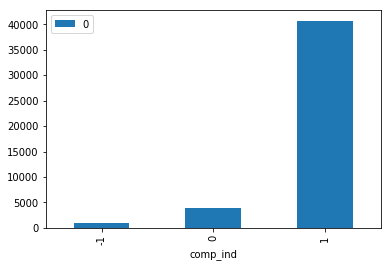

In [180]:
sizeThepie.plot.bar()